# Lecture 10/15/18
Statistical Thinking in Python II

## Linear Regression by Least Squares
* Least Squares Linear Regression is a statistical method that seeks to minimize the squared distance between each data point and the optimal line. Basically, how do I fit a line that's closest to all the data points simultaneously.

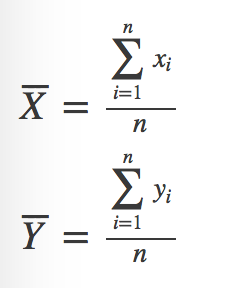

In [9]:
from IPython.core.display import Image 
Image(filename=('/Users/kevin/Dropbox/Github/Classes/IS_485_685/Sample_Mean.png'))

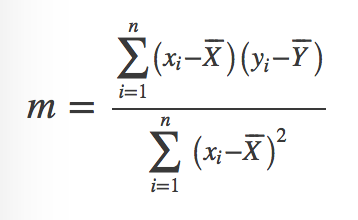

In [5]:
from IPython.core.display import Image
Image(filename='/Users/kevin/Dropbox/Github/Classes/IS_485_685/Slope_Least_Squares.png')

### Example Least Squares in Python

In [20]:
import numpy as np

x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

# Fitting a linear model to the above data
slope, intercept = np.polyfit(x, y, 1) # 1 signifies it's a 1st degree polynomial

slope, intercept

(0.5000909090909095, 3.0000909090909076)

### Plot Theoretical Linear Regression

[ 3 15] [ 4.50036364 10.50145455]


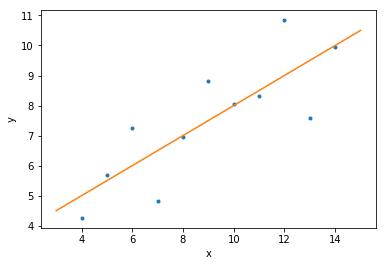

In [9]:
import matplotlib.pyplot as plt

# Plot Hypothetical Slope and Intercept from above data
x_theor = np.array([3,15])
y_theor = slope * x_theor + intercept
#print(x_theor, y_theor)

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Import more data to see RSS calculation in action

In [39]:
import pandas as pd

# Read in simple_df, index_col = 0 tells Python to not read in the index column
df = pd.read_csv('/Users/kevin/Dropbox/Github/Classes/IS_485_685/simple_df.csv', index_col=0)
print(len(df))
df.head()

162


,x,y
0,9.5,1.769
1,49.2,2.682
2,1.0,2.077
3,11.2,2.132
4,9.8,1.827


### What is least squares minimizing? Residual Sum of Squares (error between line and all data points).

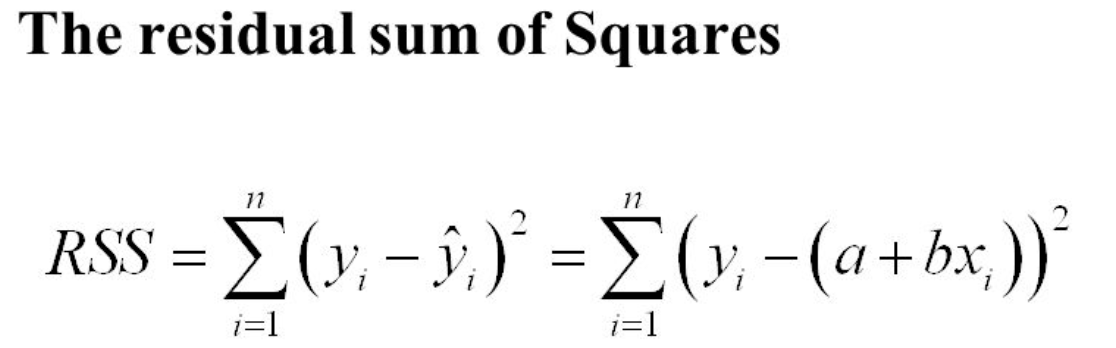

In [10]:
from IPython.core.display import Image
Image(filename='/Users/kevin/Dropbox/Github/Classes/IS_485_685/RSS.png')

0.04979854809063423 1.888050610636557


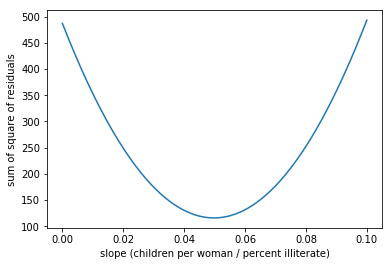

In [37]:
# Making df columns numpy arrays
x = np.array(df['x'])
y = np.array(df['y'])

# Fitting data to a linear regression using least squares
slope, intercept = np.polyfit(x, y, 1)
print(slope, intercept)

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((y - a * x - intercept)**2) # Here my slope is x and are being multiplied by x values which is a.
    #print(rss)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Bootstrapping
* Bootstrapping is the idea of resampling with replacement on the data we already have. For example, we could have the real data be a vector = [1,2,3,4] but when we bootstrap we will resample the original vector randomly, we might be [1,2,2,3]. Now we could do this a million times to simulate different combinations of means, medians, standard deviations, and other summary statistics.

#### Sample array for bootstrapping

In [42]:
rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,])

# ECDF (empirical cumulative distribution function) from stat thinking in python 1.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#### Bootstrapping 50 different ECDF's for visualization from the rainfall data

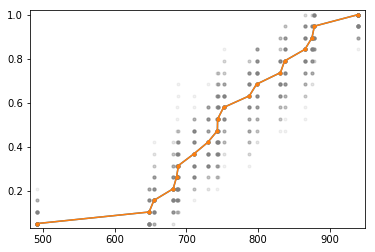

In [44]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x,y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.show()

### Bootstrap Replicate Confidence Intervals

In [46]:
# Basic bootstrap replicate resample function
def bootstrap_replicate_1d(data, func):
    """Draws a single bootstrap replicate from the data"""
    
    return func(np.random.choice(data, size=len(data)))

# Draw many bootstrap replicates at once
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

#### 95% Confidence Interval for rainfall using bootstrap replicates

95% confidence interval = [707.79907895 799.52171053] inches of rainfall


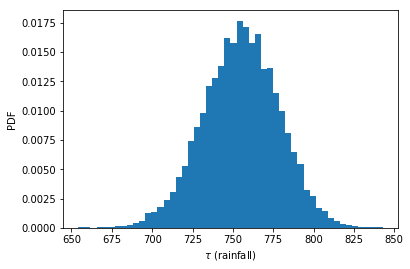

In [50]:
# 10,000 replicates of the mean of the rainfall using bootstrapping
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'inches of rainfall')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (rainfall)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()